# Plot BTD (T10.8 - T12.0) example

Plots BTD for an example.

In [7]:
%matplotlib inline

import pylab as pl
import numpy as np
import datetime
from l15_msevi.msevi import MSevi
import analysis_tools.statistics  as stats

## Get Example Data

In [43]:
t = datetime.datetime(2015, 7, 4, 10, 0)
plon, plat = 9.3, 50.3
scan_type = 'rss'
bsize = 51 # the box size of the cutout

bc = []
for i in range(1):
    
    # read sat-data
    s = MSevi(time = t, scan_type = scan_type, region = 'eu')
    s.lonlat()
    s.load('IR_087')
    s.load('IR_108')
    s.load('IR_120')
    s.rad2bt()
    
    # cutout
    p = plon, plat
    ind = gi.get_index(p, s.lon, s.lat)

    clon = gi.cutout_field4box(s.lon, ind, bsize)
    clat = gi.cutout_field4box(s.lat, ind, bsize)
    btd = s.bt['IR_108'] - s.bt['IR_120']
    btd2 = s.bt['IR_087'] - s.bt['IR_108']
    dbc = gi.cutout_field4box(btd, ind, bsize) 
    
    t += datetime.timedelta(minutes = 30)


Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file


<matplotlib.colorbar.Colorbar instance at 0x7f513c4b6dd0>

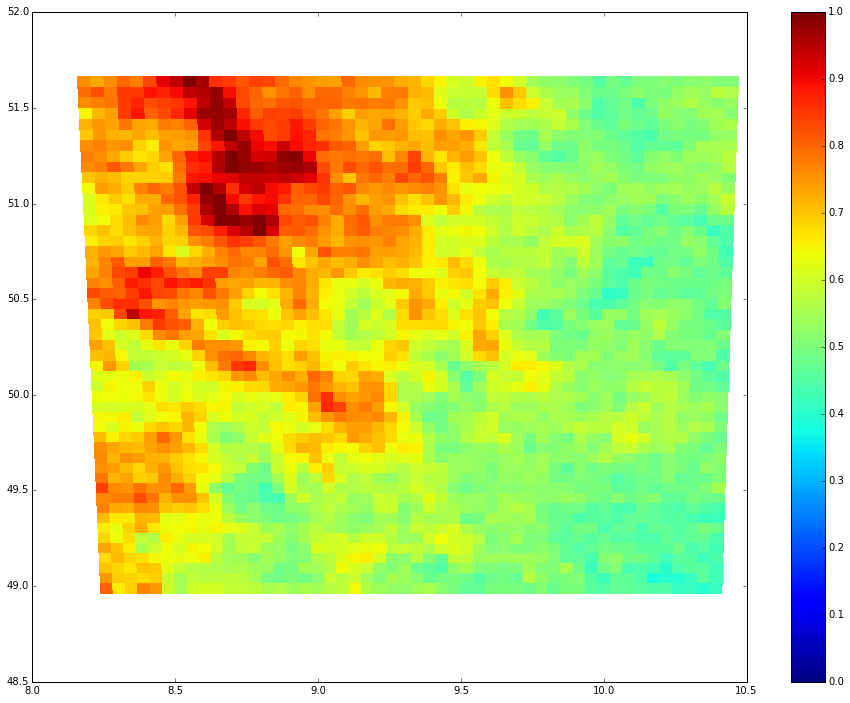

In [44]:
pl.figure(figsize = (16,12))
pl.subplot(111)

nd = np.clip(dbc / 8., 0, 1.)**0.8
rd = stats.rank_transformation(dbc)
pl.pcolormesh(clon, clat, nd, cmap = pl.cm.jet, vmin = 0, vmax = 1.)
pl.colorbar()


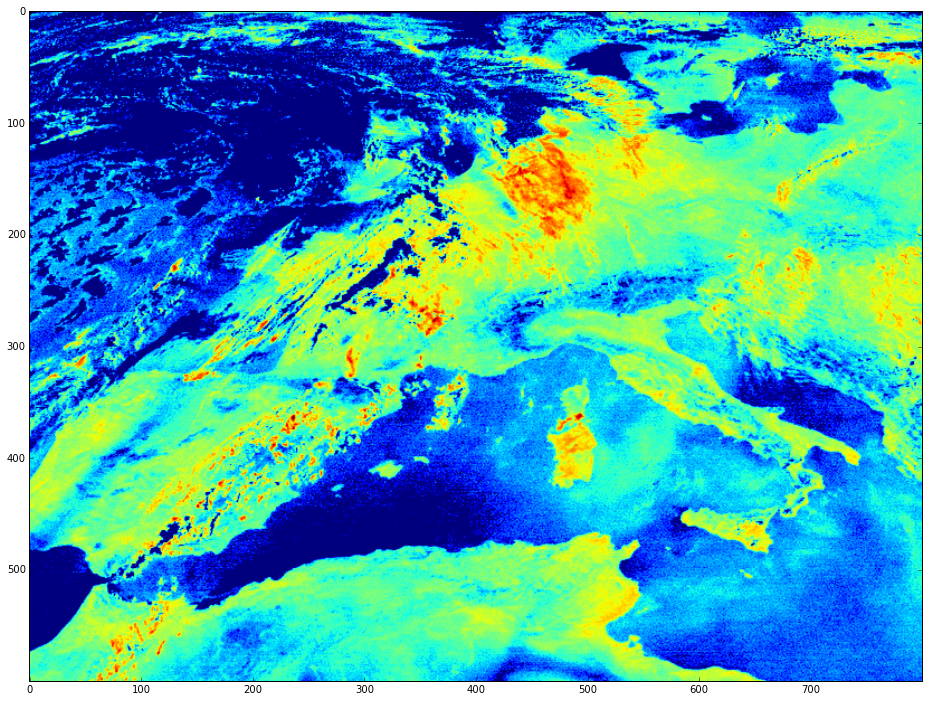

In [45]:
pl.figure(figsize=(16,12))
nd = np.clip((btd -1.) / 8., 0, 1.)**0.5
pl.imshow(nd, vmin = 0, vmax = 1)

<matplotlib.colorbar.Colorbar instance at 0x7f513c0a3f80>

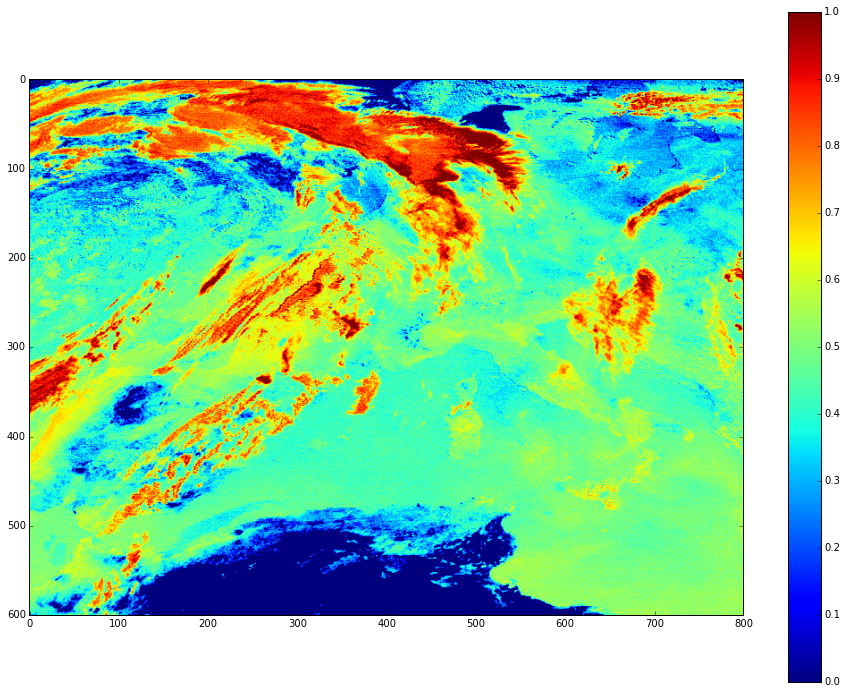

In [46]:
pl.figure(figsize=(16,12))
nd2 = np.clip((btd2 + 4) / 6., 0, 1.)**0.5
pl.imshow(nd2)
pl.colorbar()

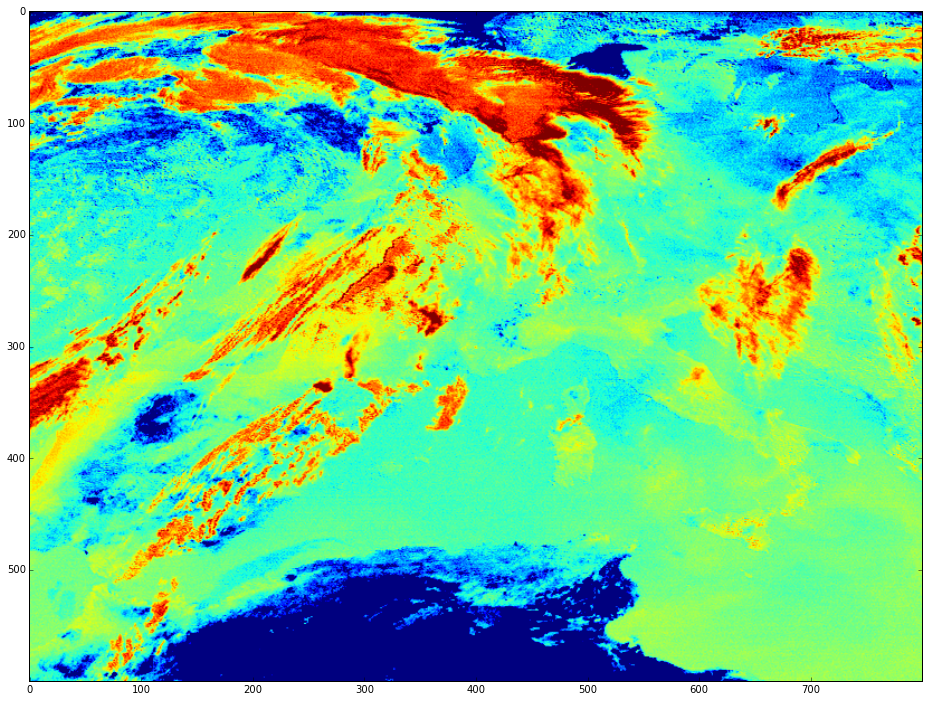

In [47]:
import IPython.html.widgets as widgets
from IPython.display import display

def sigmoid_demo(w = 1):
    
    pl.figure(figsize=(16,12))
    nd = np.clip((btd -1.) / 8., 0, 1.)**0.5
    nd2 = np.clip((btd2 + 4) / 6., 0, 1.)**0.5

    f = w * nd + (1 - w) * nd2 
    
    pl.imshow(f, vmin = 0, vmax = 1)
    
w_slider = widgets.FloatSliderWidget(min=0, max = 1, value=0)
w = widgets.interactive(sigmoid_demo, w = w_slider)
display(w)